In [7]:
import pandas as pd

df1 = pd.read_excel("dognition_data_aggregated_by_dogid.xlsx")

print(df1.head())



                                 Dog ID  Total Tests Completed  \
0  fd27b272-7144-11e5-ba71-058fbc01cf0b                     21   
1  fd27b5ba-7144-11e5-ba71-058fbc01cf0b                     20   
2  fd27b6b4-7144-11e5-ba71-058fbc01cf0b                      2   
3  fd27b79a-7144-11e5-ba71-058fbc01cf0b                     11   
4  fd27b86c-7144-11e5-ba71-058fbc01cf0b                     31   

   Mean ITI (days)  Mean ITI (minutes)  Median ITI (days)  \
0        28.201076        40609.549167           0.004687   
1         0.413307          595.162281           0.005845   
2         0.009132           13.150000           0.009132   
3        56.115179        80805.858333           0.004433   
4         7.734254        11137.326111           0.000399   

   Median ITI (minutes)  Time diff between first and last game (days)  \
0              6.750000                                    564.021516   
1              8.416667                                      7.852836   
2             13.

In [29]:
df2 = pd.read_excel("dognition_data_no_aggregation_with_zip_code_correction.xlsx")

print(df2.head())


           Created_at          Updated_at  \
0 2013-05-13 16:17:00 2013-05-13 16:17:00   
1 2013-05-22 18:54:00 2013-05-22 18:54:00   
2 2013-05-22 18:55:00 2013-05-22 18:55:00   
3 2013-05-22 18:56:00 2013-05-22 18:56:00   
4 2013-05-22 18:58:00 2013-05-22 18:58:00   

                                User_ID                                Dog_ID  \
0  ce134a78-7144-11e5-ba71-058fbc01cf0b  fd3d1b44-7144-11e5-ba71-058fbc01cf0b   
1  ce134a78-7144-11e5-ba71-058fbc01cf0b  fd3d1b44-7144-11e5-ba71-058fbc01cf0b   
2  ce134a78-7144-11e5-ba71-058fbc01cf0b  fd3d1b44-7144-11e5-ba71-058fbc01cf0b   
3  ce134a78-7144-11e5-ba71-058fbc01cf0b  fd3d1b44-7144-11e5-ba71-058fbc01cf0b   
4  ce134a78-7144-11e5-ba71-058fbc01cf0b  fd3d1b44-7144-11e5-ba71-058fbc01cf0b   

             Test_name Subcategory_name Gender  Birthday     Breed  \
0         Yawn Warm-up          Empathy   male      2009  Shih Tzu   
1            Yawn Game          Empathy   male      2009  Shih Tzu   
2  Eye Contact Warm-up          

In [30]:
df3 = pd.concat([df1, df2], ignore_index=True)
print("\nColumn Names for df3:")
print(df3.columns)


Column Names for df3:
Index(['Dog ID', 'Total Tests Completed', 'Mean ITI (days)',
       'Mean ITI (minutes)', 'Median ITI (days)', 'Median ITI (minutes)',
       'Time diff between first and last game (days)',
       'Time diff between first and last game (minutes)', 'User ID', 'Gender',
       'Birthday', 'Breed', 'Breed_Type', 'Breed_Group', 'Weight', 'Dog_Fixed',
       'DNA_Tested', 'Dimension', 'Sign_in_Count', 'Max_Dogs', 'Membership_ID',
       'Subscribed', 'City', 'State', 'Zip', 'Country', 'Exclude',
       'Free_Start_User', 'Last_Active_At', 'Membership_Type', 'Created_at',
       'Updated_at', 'User_ID', 'Dog_ID', 'Test_name', 'Subcategory_name',
       'Rating', 'Rank_by_UserID', 'Rank_by_DogID'],
      dtype='object')


In [33]:
Features = df3[["Dog ID","Total Tests Completed","Mean ITI (days)", "Mean ITI (minutes)", "Median ITI (days)", "Gender", "Birthday", "Breed", "Dimension"]]
Features.head()

,Dog ID,Total Tests Completed,Mean ITI (days),Mean ITI (minutes),Median ITI (days),Gender,Birthday,Breed,Dimension
0,fd27b272-7144-11e5-ba71-058fbc01cf0b,21.0,28.201076,40609.549167,0.004687,female,2011.0,Labrador Retriever,charmer
1,fd27b5ba-7144-11e5-ba71-058fbc01cf0b,20.0,0.413307,595.162281,0.005845,male,2007.0,Shetland Sheepdog,protodog
2,fd27b6b4-7144-11e5-ba71-058fbc01cf0b,2.0,0.009132,13.150000,0.009132,male,2012.0,Golden Retriever,0
3,fd27b79a-7144-11e5-ba71-058fbc01cf0b,11.0,56.115179,80805.858333,0.004433,male,2011.0,Golden Retriever,0
4,fd27b86c-7144-11e5-ba71-058fbc01cf0b,31.0,7.734254,11137.326111,0.000399,female,2010.0,Shih Tzu,einstein


In [67]:
Features["Dimension"].replace(0, "ace", inplace = True)
Features["Dimension"] = Features["Dimension"].fillna(Features["Dimension"].mode)
Dimension_totalTests = Features.groupby(['Dimension'])['Total Tests Completed'].sum()
Dimension_totalTests

KeyError: 'Dimension'

In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195467 entries, 0 to 195466
Data columns (total 39 columns):
 #   Column                                           Non-Null Count   Dtype         
---  ------                                           --------------   -----         
 0   Dog ID                                           17986 non-null   object        
 1   Total Tests Completed                            17986 non-null   float64       
 2   Mean ITI (days)                                  16718 non-null   float64       
 3   Mean ITI (minutes)                               16718 non-null   float64       
 4   Median ITI (days)                                16718 non-null   float64       
 5   Median ITI (minutes)                             16718 non-null   float64       
 6   Time diff between first and last game (days)     17986 non-null   float64       
 7   Time diff between first and last game (minutes)  17986 non-null   float64       
 8   User ID                 

In [46]:
Features["Dimension"]

0          charmer
1         protodog
2              ace
3              ace
4         einstein
            ...   
195462         NaN
195463         NaN
195464         NaN
195465         NaN
195466         NaN
Name: Dimension, Length: 195467, dtype: object

In [48]:
Dimension_Group = Features.groupby(['Dimension'])
DT_Corrolation = Dimension_Group['Total Tests Completed'].sum()
DT_Corrolation

Dimension
ace                96169.0
charmer            14884.0
einstein            2791.0
expert              6425.0
maverick            5769.0
protodog           13078.0
renaissance-dog    10922.0
socialite          18671.0
stargazer           7664.0
Name: Total Tests Completed, dtype: float64

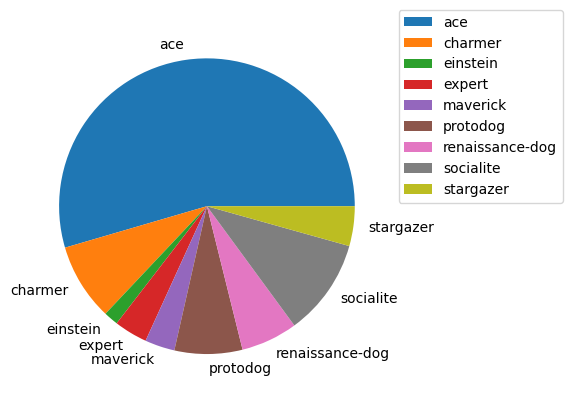

In [63]:
import matplotlib.pyplot as plt

ax = DT_Corrolation.plot(kind="pie", ylabel = '')
ax.legend(bbox_to_anchor=(1, 1.05), loc='upper left')
plt.show()

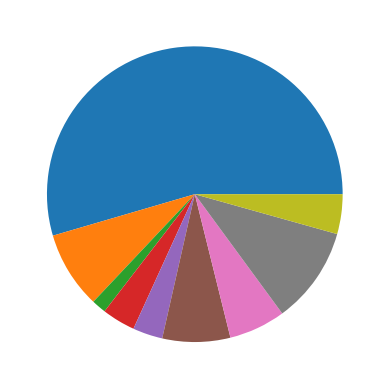

In [61]:
plt.pie(DT_Corrolation)
plt.show()